In [1]:
class Card:
    STRING_KEY = dict( { 
            'K':'King',  'Q':'Queen',  'J':'Jack',  'A':'Ace', 
            '10':'Ten',  '9':'Nine',   '8':'Eight', '7':'Seven',
            '6':'Six',   '5':'Five',   '4':'Four',  '3':'Three',
            '2':'Two',

            'S':'Spades','H':'Hearts', 'C':'Clubs', 'D':'Diamonds'
    } )
    
    
    
    def __init__( self , face, suit ):
        self.face  = face if ( self.is_face_card(face) or self.is_valid_number_card(face) ) else 'A'
        self.suit  = suit if suit in 'SCDH' else 'S'
        self.value = self.get_value( )
    
    
    
    def __repr__( self ):
        return '{} of {}'.format( Card.STRING_KEY[self.face] , Card.STRING_KEY[self.suit] )
        
        
        
    def get_value( self ):
        if self.face.isnumeric( ):
            return int( self.face )
        else:
            return 10 if self.face is not 'A' else 1
        
        
        
    def is_face_card( self , face ):
        return face in 'AKQJ'
    
    
    
    def is_valid_number_card( self , face ):
        if type( face ) is int:
            return face >= 2 and face <= 10
        elif type( face ) is str:
            if face.isnumeric( ):
                return self.is_valid_number_card( int( face ) )
        return False
    
    
    
c = Card( 'A' , 'S' )
print( c , '-' , c.value )

Ace of Spades - 1


In [2]:
class Deck:
    def __init__( self ):
        self.deck = list( )
        self.used = list( )
        self.set_deck( )
        
        
        
    def set_deck( self ):
        import random
        deck = list( )
        for face in [ '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' , '10',
                      'J' , 'Q' , 'K' , 'A' ]:
            for suit in 'HDSC':
                deck.append( Card( face=str( face ) , suit=suit ) )
        random.shuffle( deck )
        self.deck = deck
        return
    
    
    
    def reset( self ):
        import random
        self.deck += self.used
        self.used  = list( )
        random.shuffle( self.deck )
        return
    
    
    
    def draw( self , n=1 ):
        cards      = self.deck[:n]
        self.used += cards
        self.deck = self.deck[n:]
        return cards
    
    
    
deck = Deck( )
print( deck.deck )
print( deck.draw( ) )
print( deck.draw( 2 ) )
print( deck.deck )
deck.reset( )
print( deck.deck )

[Two of Diamonds, Ten of Clubs, Jack of Clubs, Five of Hearts, Six of Hearts, Four of Hearts, Two of Spades, King of Spades, Jack of Diamonds, Five of Clubs, Six of Clubs, Nine of Diamonds, Jack of Hearts, Ten of Diamonds, King of Diamonds, Seven of Diamonds, Five of Spades, Ace of Clubs, Ace of Diamonds, Three of Spades, Ten of Hearts, Two of Clubs, Eight of Diamonds, Queen of Spades, Two of Hearts, Six of Diamonds, Three of Hearts, Seven of Hearts, Nine of Spades, Six of Spades, Queen of Hearts, King of Clubs, Ace of Spades, Three of Diamonds, Queen of Diamonds, Eight of Hearts, Jack of Spades, Four of Spades, Ten of Spades, Nine of Hearts, Ace of Hearts, Four of Diamonds, Four of Clubs, Three of Clubs, Eight of Spades, Seven of Clubs, Nine of Clubs, Seven of Spades, King of Hearts, Queen of Clubs, Five of Diamonds, Eight of Clubs]
[Two of Diamonds]
[Ten of Clubs, Jack of Clubs]
[Five of Hearts, Six of Hearts, Four of Hearts, Two of Spades, King of Spades, Jack of Diamonds, Five of C

In [3]:
class Dealer:
    def __init__( self ):
        self.name    = 'Dealer'
        self.handval = ( 0 , 0 )
        self.maxval  = 17
        self.winval  = 21
        self.hand    = list( )
        self.ace     = False
        return
    
    
    
    def reset( self ):
        self.hand    = list( )
        self.handval = ( 0 , 0 )
        self.ace     = False
        
        
        
    def get_hand_value( self ):
        return self.handval
        
        
        
    def recompute_hand_value( self ):
        value = ( 0 , 0 )
        for card in self.hand:
            value = ( value[0] + card.value , value[1] + card.value )
            if card.face is 'A':
                self.ace = True
        return ( value[0] , value[1] + 10 ) if self.ace else value
        
        
        
    def act( self ):
        if len( self.hand ) < 2:
            return 'HIT'
        if self.winval in self.handval:
            return 'STAND'
        return 'HIT' if self.handval[0] < self.maxval else 'STAND'
        
        
        
    def add_card( self , card ):
        self.hand.append( card )
        self.handval = ( self.handval[0] + card.value , self.handval[1] + card.value )
        if card.face is 'A' and not self.ace:
            self.ace     = True
            self.handval = ( self.handval[0] , self.handval[1] + 10 )
        
        
        
    def add_cards( self , cards ):
        for c in cards:
            self.hand.append( c )
            self.handval = ( self.handval[0] + c.value , self.handval[1] + c.value )
            if c.face is 'A' and not self.ace:
                self.ace     = True
                self.handval = ( self.handval[0] , self.handval[1] + 10 )
            
            
            
    def is_bust( self ):
        return self.handval[0] > self.winval
        
        
        
    def is_win( self ):
        return self.winval in self.handval
        
        
        
dealer = Dealer( )
dealer.add_cards( deck.draw( 2 ) )
act = dealer.act( )
print( 'INITIAL:' )
print( '   Hand: {}'.format( dealer.hand ) )
print( '   Handval: {}'.format( dealer.get_hand_value( ) ) )
print( '   Act: {}'.format( act ) )
if dealer.is_win( ):
    print( '   BLACKJACK!' )
print( '' )

while act != 'STAND':
    if act == 'HIT':
        dealer.add_cards( deck.draw( ) )
    act = dealer.act( )
    print( 'Iteration:' )
    print( '   Hand: {}'.format( dealer.hand ) )
    print( '   Handval: {}'.format( dealer.get_hand_value( ) ) )
    print( '   Act: {}'.format( act ) )
    if dealer.is_bust( ):
        print( '   BUST' )
    elif dealer.is_win( ):
        print( '   BLACKJACK!' )
    print( '' )
    
dealer.reset( )
deck.reset( )

INITIAL:
   Hand: [Seven of Hearts, King of Hearts]
   Handval: (17, 17)
   Act: STAND



In [4]:
class LearnedPlayer:
    def __init__( self ):
        # States: (player hand value)
        # Actions: HIT -- get a card, STAND -- no more
        # Reward: 1 if win (handval > dealer's or blackjack), -1 if bust
        self.name    = 'Player'
        self.winval  = 21
        self.hand    = list( )
        self.handval = ( 0 , 0 )
        self.ace     = False
        self.qtable  = dict( )
        self.path    = list( )
        self.gamma   = 1
        self.epsilon = 0.9
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.9
        return
    
    
    
    def add_card( self , card ):
        self.hand.append( card )
        self.handval = ( self.handval[0] + card.value , self.handval[1] + card.value )
        if card.face is 'A' and not self.ace:
            self.ace     = True
            self.handval = ( self.handval[0] , self.handval[1] + 10 )
        
        
        
    def add_cards( self , cards ):
        for c in cards:
            self.hand.append( c )
            self.handval = ( self.handval[0] + c.value , self.handval[1] + c.value )
            if c.face is 'A' and not self.ace:
                self.ace     = True
                self.handval = ( self.handval[0] , self.handval[1] + 10 )
                
                
                
    def reset( self ):
        self.hand    = list( )
        self.handval = ( 0 , 0 )
        self.ace     = False
        self.path    = list( )
        
        # decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon = min( self.epsilon * self.epsilon_decay , self.epsilon_min )
        
        
        
    def act( self ):
        import random
        # TODO
        
        state   = self.handval
        
        # === Exploration === #
        if random.random( ) < self.epsilon:
            action = random.choice( [ 'HIT' , 'STAND' ] )
            self.path.append( ( state , action ) )
            return action
        
        # === Exploitation === #
        weights = self.qtable.get( state , ( (0,1) , (0,1) ) )
        action  = 'HIT' if weights[0][0] > weights[1][0] else 'STAND'
        self.path.append( ( state , action ) )
        return action
    
    
    
    def cumulative_average(self,val,n,newval):
        avg = (newval + val*n) / (n+1)
        new_n = n + 1
        return (avg , new_n)
    
    
    
    def propagate( self , rewardval ):
        decay = self.gamma
        for state , action in self.path[::-1]:
            self.qtable[state] = self.qtable.get(state, [(0,0),(0,0)])
            hit = self.qtable[state][0]
            stand = self.qtable[state][1]
            if action == 'HIT':
                self.qtable[state] = ( self.cumulative_average( hit[0], hit[1] , decay*rewardval) , stand )
            else:
                self.qtable[state] = ( hit , self.cumulative_average( stand[0], stand[1] , decay*rewardval ) )
            decay *= self.gamma
            continue
        self.path = list()
    
    
    def reward( self , game_results ):
        discount = self.gamma
        if game_results == 'P':
            self.propagate(1)
        elif game_results == 'D':
            self.propagate(-1)
        else:
            #punish ties
            self.propagate(-1)
        return
    
    
    
    def is_bust( self ):
        return self.handval[0] > self.winval
        
        
        
    def is_win( self ):
        return self.winval in self.handval
    
    
    
lp = LearnedPlayer( )
lp.add_cards( deck.draw( 2 ) )
print( lp.hand , ' -- ' , lp.handval )
lp.reset( )
deck.reset( )

[Queen of Spades, Queen of Diamonds]  --  (20, 20)


In [5]:
class Game:
    def __init__( self ):
        self.deck   = Deck( )
        self.dealer = Dealer( )
        self.player = LearnedPlayer( )
        self.winval = 21
        self.winner = ''
        self.winlog = list( )
        
        
        
    def reset( self ):
        self.deck.reset( )
        self.dealer.reset( )
        self.player.reset( )
        
        
        
    def clear_log( self ):
        self.winlog = list( )
        
        
        
    def conditional_print( self , value , display=True ):
        if display:
            print(value)
            
    
    
    def get_winner( self ):
        if self.player.is_win():
            return 'P'  # Player
        elif self.dealer.is_win():
            return 'D'  # Dealer
        elif self.player.is_bust() and self.dealer.is_bust():
            return 'T'  # Tie
        elif self.player.is_bust() and not self.dealer.is_bust():
            return 'D'  # Dealer
        elif self.dealer.is_bust() and not self.player.is_bust():
            return 'P'  # Player
        else:
            playerscore = self.player.handval[1] if self.player.handval[1] <= self.winval else self.player.handval[0]
            dealerscore = self.dealer.handval[1] if self.dealer.handval[1] <= self.winval else self.dealer.handval[0]
            if playerscore == dealerscore:
                return 'T'  # Tie
            else:
                return 'P' if playerscore > dealerscore else 'D'
        
        
        
    def build_hand( self , actor , display=True ):
        actor.add_cards( self.deck.draw( 2 ) )
        action = actor.act( )
        self.conditional_print( "\n{}'s Hand: {}".format( actor.name , actor.hand ) , display )
        self.conditional_print( "{}'s Hand Values (Min,Max): {}".format( actor.name , actor.handval ) , display )
        if not actor.is_win( ):
            self.conditional_print( "{}'s Action: {}".format( actor.name , action ) , display )
        else:
            self.conditional_print( 'BLACKJACK' , display )
            return
        while action == 'HIT':
            actor.add_cards( self.deck.draw( ) )
            action = actor.act( )
            self.conditional_print( "\n{}'s Hand: {}".format( actor.name , actor.hand ) , display )
            self.conditional_print( "{}'s Hand Values (Min,Max): {}".format( actor.name , actor.handval ) , display )
            if actor.is_bust( ):
                self.conditional_print( 'BUST' , display )
                return
            elif actor.is_win( ):
                self.conditional_print( 'BLACKJACK' , display )
                return
            else:
                self.conditional_print( "{}'s Action: {}".format( actor.name , action ) , display )
        return
        
        
        
    def print_final_results( self ):
        print( '\n\n### RESULTS ###' )
        print( 'Player Final Hand: {}'.format( self.player.hand ) )
        print( 'Player Final Hand Value {}'.format( self.player.handval ) )
        print( 'Dealer Final Hand: {}'.format( self.dealer.hand ) )
        print( 'Dealer Final Hand Value {}'.format( self.dealer.handval ) )
        if self.player.is_bust( ) and not self.dealer.is_bust( ):
            print( '** DEALER WINS -- PLAYER BUST **\n' )
        elif self.dealer.is_bust( ) and not self.player.is_bust( ):
            print( '** PLAYER WINS -- DEALER BUST **\n' )
        elif self.player.is_bust( ) and self.dealer.is_bust( ):
            print( '** ALL BUST -- NO WINNER **\n' )
        else:
            #playerscore = max( [ v for v in self.player.handval if v <= self.winval ] )
            #dealerscore = max( [ v for v in self.dealer.handval if v <= self.winval ] )
            playerscore = self.player.handval[1] if self.player.handval[1] <= self.winval else self.player.handval[0]
            dealerscore = self.dealer.handval[1] if self.dealer.handval[1] <= self.winval else self.dealer.handval[0]
            if playerscore > dealerscore:
                print( '** PLAYER WINS **\n' )
            elif playerscore < dealerscore:
                print( '** DEALER WINS **\n' )
            else:
                print( '** TIE **\n' )
        return
        
        
        
    def play_manual( self ):
        self.reset( )
        
        self.player.add_cards( self.deck.draw( 2 ) )
        print( 'Player Hand: {}'.format( self.player.hand ) )
        print( 'Player Hand Value (min,max): {}'.format( self.player.handval ) )
        if not self.player.is_win( ):
            action = input( 'HIT or STAND? ' ).upper( )
        else:
            action = 'STAND'
            print( 'BLACKJACK' )
            
        while action == 'HIT':
            self.player.add_cards( self.deck.draw( ) )
            print( '\nYour Hand: {}'.format( self.player.hand ) )
            print( 'Your Hand Value (min,max): {}'.format( self.player.handval ) )
            if self.player.is_bust( ):
                print( 'BUST' )
                break
            elif self.player.is_win( ):
                print( 'BLACKJACK -- YOU WIN' )
                break
            else:
                action = input( 'HIT or STAND? ' ).upper( )
                
        if not self.player.is_win( ):
            self.build_hand( self.dealer )
            
        self.print_final_results( )
        return
    
    
    
    def play_auto( self , display=True ):
        self.reset( )
        self.build_hand( self.player , display )
                
        if not self.player.is_win( ):
            self.build_hand( self.dealer , display )
            
        if display:
            self.print_final_results( )
            
        winner = self.get_winner( )
        self.player.reward( winner )
        self.winlog.append( winner )
        return
    
    
    
    def demo( self , display=True ):
        eps = self.player.epsilon
        self.player.epsilon = 0
        self.reset( )
        self.build_hand( self.player , display )
                
        if not self.player.is_win( ):
            self.build_hand( self.dealer , display )
            
        if display:
            self.print_final_results( )
            
        self.player.epsilon = eps
        return
                
        
        
game           = Game( )
num_episodes   = 100000
print_interval = 100000
for i in range( num_episodes ):
    if i == 0 or ( i + 1 ) % print_interval == 0:
        print( '\n\nGAME NUMBER {}'.format( i + 1 ) )
        game.play_auto( display=True )
    else:
        game.play_auto( display=False )



GAME NUMBER 1

Player's Hand: [Jack of Clubs, Nine of Hearts]
Player's Hand Values (Min,Max): (19, 19)
Player's Action: STAND

Dealer's Hand: [Nine of Clubs, Ten of Spades]
Dealer's Hand Values (Min,Max): (19, 19)
Dealer's Action: STAND


### RESULTS ###
Player Final Hand: [Jack of Clubs, Nine of Hearts]
Player Final Hand Value (19, 19)
Dealer Final Hand: [Nine of Clubs, Ten of Spades]
Dealer Final Hand Value (19, 19)
** TIE **



GAME NUMBER 100000

Player's Hand: [Queen of Spades, Six of Diamonds]
Player's Hand Values (Min,Max): (16, 16)
Player's Action: STAND

Dealer's Hand: [Five of Diamonds, King of Spades]
Dealer's Hand Values (Min,Max): (15, 15)
Dealer's Action: HIT

Dealer's Hand: [Five of Diamonds, King of Spades, Nine of Diamonds]
Dealer's Hand Values (Min,Max): (24, 24)
BUST


### RESULTS ###
Player Final Hand: [Queen of Spades, Six of Diamonds]
Player Final Hand Value (16, 16)
Dealer Final Hand: [Five of Diamonds, King of Spades, Nine of Diamonds]
Dealer Final Hand Value 

In [6]:
game.demo()


Player's Hand: [Ace of Diamonds, Five of Hearts]
Player's Hand Values (Min,Max): (6, 16)
Player's Action: HIT

Player's Hand: [Ace of Diamonds, Five of Hearts, Ten of Spades]
Player's Hand Values (Min,Max): (16, 26)
Player's Action: STAND

Dealer's Hand: [Queen of Diamonds, King of Hearts]
Dealer's Hand Values (Min,Max): (20, 20)
Dealer's Action: STAND


### RESULTS ###
Player Final Hand: [Ace of Diamonds, Five of Hearts, Ten of Spades]
Player Final Hand Value (16, 26)
Dealer Final Hand: [Queen of Diamonds, King of Hearts]
Dealer Final Hand Value (20, 20)
** DEALER WINS **



In [7]:
print(game.player.qtable)

{(19, 19): ((-0.7242990654205609, 428), (0.1420216147488879, 7865)), (10, 10): ((0.0030155416376710853, 4311), (-0.4235807860262008, 229)), (12, 12): ((-0.37458157866321157, 9261), (-0.39642481598317564, 951)), (17, 17): ((-0.6157205240174678, 458), (-0.40745762711864414, 8850)), (11, 21): ((1.0, 279), (1.0, 5472)), (14, 14): ((-0.45098039215686253, 561), (-0.39572931052799354, 9413)), (9, 9): ((-0.11811023622047225, 3810), (-0.4396135265700483, 207)), (22, 22): ((-1.0, 173), (-1.0, 3682)), (15, 15): ((-0.5326460481099654, 582), (-0.40736318407960237, 10050)), (20, 20): ((-0.831649831649831, 594), (0.41706566347469265, 11696)), (24, 24): ((-1.0, 19), (-1.0, 364)), (18, 18): ((-0.65079365079365, 441), (-0.09356014580801969, 8230)), (16, 16): ((-0.5567567567567574, 555), (-0.40601585405581425, 9209)), (5, 15): ((-0.14617618586640857, 1033), (-0.353488372093023, 430)), (13, 13): ((-0.4093444909344497, 8604), (-0.40972684876748827, 1501)), (11, 11): ((0.156472795497186, 5330), (-0.43848580

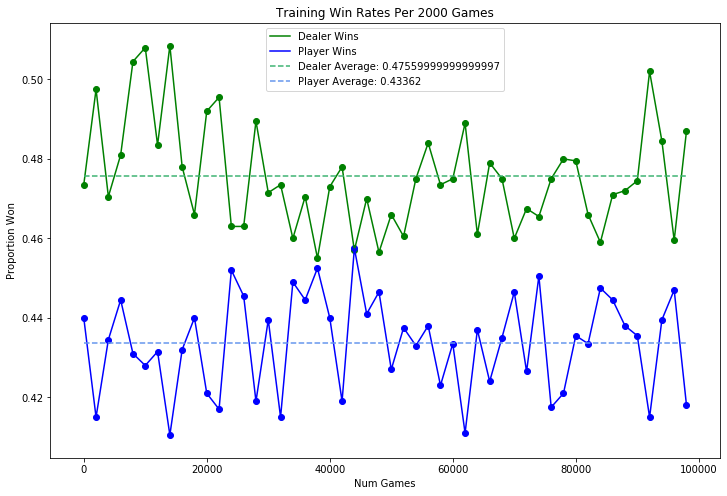

In [8]:
import matplotlib.pyplot as plt
import numpy as np

show_scatter = True
show_dealer  = True
show_player  = True
show_tie     = False
show_average = True
num_buckets  = 50
winner_log   = game.winlog
bucket_size  = len(winner_log)//num_buckets
p , d , t    = 0 , 0 , 0
x = [i*bucket_size for i in range(num_buckets)]
y_p, y_d, y_t = list(), list(), list()
for i in range(len(winner_log)):
    if (i+1) % bucket_size == 0:
        y_p.append(p/bucket_size)
        y_d.append(d/bucket_size)
        y_t.append(t/bucket_size)
        p, d, t = 0, 0, 0
    if winner_log[i] == 'D':
        d += 1
    elif winner_log[i] == 'P':
        p += 1
    else:
        t += 1
   
plt.figure(figsize=(12,8))
plt.title('Training Win Rates Per {} Games'.format(bucket_size))
plt.xlabel('Num Games')
plt.ylabel('Proportion Won')
if show_dealer:
    plt.plot(x,y_d,c='g',label='Dealer Wins')
if show_player:
    plt.plot(x,y_p,c='b',label='Player Wins')
if show_tie:
    plt.plot(x,y_t,c='r',label='Tied Games')
if show_scatter:
    if show_dealer:
        plt.scatter(x,y_d,c='g')
    if show_player:
        plt.scatter(x,y_p,c='b')
    if show_tie:
        plt.scatter(x,y_t,c='r')
if show_average:
    if show_dealer:
        plt.plot(x,[np.mean(y_d)]*len(x),c='mediumseagreen', linestyle='--', label='Dealer Average: {}'.format(np.mean(y_d)))
    if show_player:
        plt.plot(x,[np.mean(y_p)]*len(x),c='cornflowerblue', linestyle='--', label='Player Average: {}'.format(np.mean(y_p)))
    if show_tie:
        plt.plot(x,[np.mean(y_t)]*len(x),c='salmon', linestyle='--', label='Tie Average: {}'.format(np.mean(y_t)))
plt.legend()
plt.show()

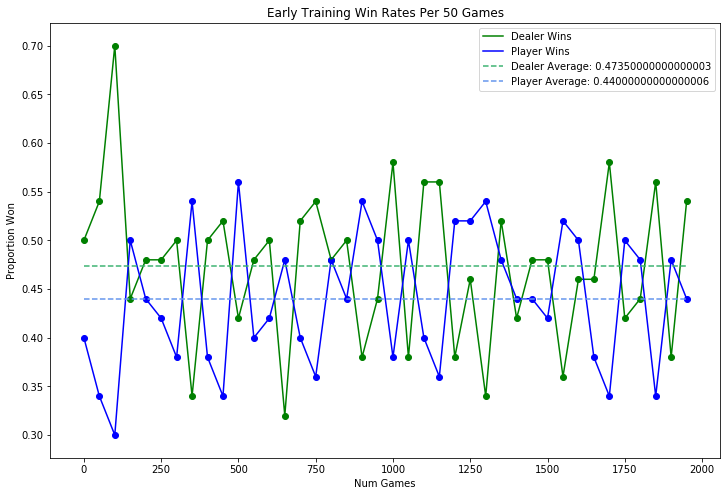

In [9]:
num_buckets2     = 40
early_window     = winner_log[:bucket_size]
bucket_size2     = len(early_window)//num_buckets2
x2               = [i*bucket_size2 for i in range(num_buckets2)]
p2 , d2 , t2     = 0 , 0 , 0
y_p2, y_d2, y_t2 = list(), list(), list()
for i in range(len(early_window)):
    if (i+1) % bucket_size2 == 0:
        y_p2.append(p2/bucket_size2)
        y_d2.append(d2/bucket_size2)
        y_t2.append(t2/bucket_size2)
        p2, d2, t2 = 0, 0, 0
    if early_window[i] == 'D':
        d2 += 1
    elif early_window[i] == 'P':
        p2 += 1
    else:
        t2 += 1

plt.figure(figsize=(12,8))
plt.title('Early Training Win Rates Per {} Games'.format(bucket_size2))
plt.xlabel('Num Games')
plt.ylabel('Proportion Won')
if show_dealer:
    plt.plot(x2,y_d2,c='g',label='Dealer Wins')
if show_player:
    plt.plot(x2,y_p2,c='b',label='Player Wins')
if show_tie:
    plt.plot(x2,y_t2,c='r',label='Tied Games')
if show_scatter:
    if show_dealer:
        plt.scatter(x2,y_d2,c='g')
    if show_player:
        plt.scatter(x2,y_p2,c='b')
    if show_tie:
        plt.scatter(x2,y_t2,c='r')
if show_average:
    if show_dealer:
        plt.plot(x2,[np.mean(y_d2)]*len(x2),c='mediumseagreen', linestyle='--', label='Dealer Average: {}'.format(np.mean(y_d2)))
    if show_player:
        plt.plot(x2,[np.mean(y_p2)]*len(x2),c='cornflowerblue', linestyle='--', label='Player Average: {}'.format(np.mean(y_p2)))
    if show_tie:
        plt.plot(x2,[np.mean(y_t2)]*len(x2),c='salmon', linestyle='--', label='Tie Average: {}'.format(np.mean(y_t2)))
        

plt.legend()
plt.show()

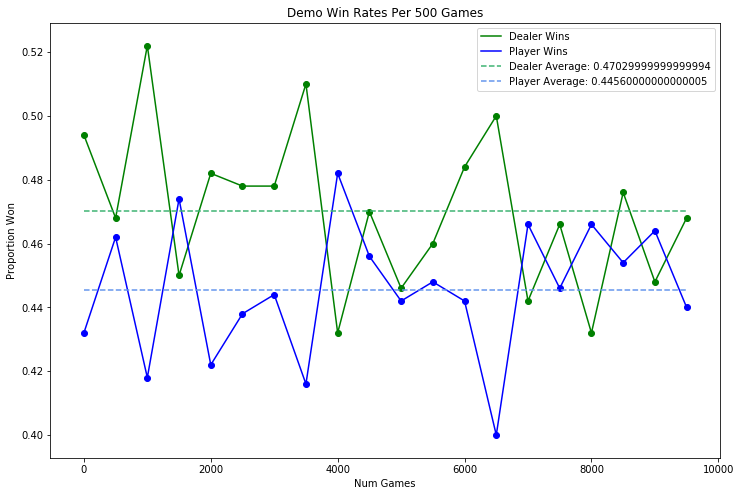

In [11]:
game.clear_log()
num_rounds = 10000
demolog = [''] * num_rounds
for i in range(num_rounds):
    game.demo(display=False)
    demolog[i] = game.get_winner()

num_buckets3     = 20
bucket_size3     = len(demolog)//num_buckets3
x3               = [i*bucket_size3 for i in range(num_buckets3)]
p3 , d3 , t3     = 0 , 0 , 0
y_p3, y_d3, y_t3 = list(), list(), list()
for i in range(len(demolog)):
    if (i+1) % bucket_size3 == 0:
        y_p3.append(p3/bucket_size3)
        y_d3.append(d3/bucket_size3)
        y_t3.append(t3/bucket_size3)
        p3, d3, t3 = 0, 0, 0
    if demolog[i] == 'D':
        d3 += 1
    elif demolog[i] == 'P':
        p3 += 1
    else:
        t3 += 1

plt.figure(figsize=(12,8))
plt.title('Demo Win Rates Per {} Games'.format(bucket_size3))
plt.xlabel('Num Games')
plt.ylabel('Proportion Won')
if show_dealer:
    plt.plot(x3,y_d3,c='g',label='Dealer Wins')
if show_player:
    plt.plot(x3,y_p3,c='b',label='Player Wins')
if show_tie:
    plt.plot(x3,y_t3,c='r',label='Tied Games')
if show_scatter:
    if show_dealer:
        plt.scatter(x3,y_d3,c='g')
    if show_player:
        plt.scatter(x3,y_p3,c='b')
    if show_tie:
        plt.scatter(x3,y_t3,c='r')
if show_average:
    if show_dealer:
        plt.plot(x3,[np.mean(y_d3)]*len(x3),c='mediumseagreen', linestyle='--', label='Dealer Average: {}'.format(np.mean(y_d3)))
    if show_player:
        plt.plot(x3,[np.mean(y_p3)]*len(x3),c='cornflowerblue', linestyle='--', label='Player Average: {}'.format(np.mean(y_p3)))
    if show_tie:
        plt.plot(x3,[np.mean(y_t3)]*len(x3),c='salmon', linestyle='--', label='Tie Average: {}'.format(np.mean(y_t3)))
        

plt.legend()
plt.show()